<a href="https://colab.research.google.com/github/FallTini/-huzalabs-ai-training-homeworks/blob/main/Assignement_w8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [5]:
Maize_data = pd.read_csv("/content/Rwanda-Maize-Production-2018.csv")

In [6]:
Maize_data.head()


,District,S A Production (Ton),S B Production (Ton),Total Production (Ton)
0,Nyarugenge,374,275,649
1,Gasabo,4851,1797,6648
2,Kicukiro,1570,504,2074
3,Nyanza,7875,2495,10370
4,Gigasara,16057,1922,17979


In [7]:
Maize_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   District                30 non-null     object
 1   S A Production (Ton)    30 non-null     int64 
 2   S B Production (Ton)    30 non-null     int64 
 3   Total Production (Ton)  30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [8]:
Maize_data.tail()

,District,S A Production (Ton),S B Production (Ton),Total Production (Ton)
25,Gatsibo,39852,12249,52101
26,Kayonza,20181,5546,25727
27,Kirehe,21438,4852,26290
28,Ngoma,23020,1947,24967
29,Bugesera,10561,13703,24264


In [9]:
#Checking column names
Maize_data.columns

Index(['District', 'S A Production (Ton)', 'S B Production (Ton)',
       'Total Production (Ton)'],
      dtype='object')

In [10]:
# from the info() function we can see that there as missing values
#let's check missing values using isnull function

Maize_data.isnull().sum()

District                  0
S A Production (Ton)      0
S B Production (Ton)      0
Total Production (Ton)    0
dtype: int64

In [11]:
#Remove missing values
Maize_data.dropna(inplace=True)

In [12]:
Maize_data.tail()

,District,S A Production (Ton),S B Production (Ton),Total Production (Ton)
25,Gatsibo,39852,12249,52101
26,Kayonza,20181,5546,25727
27,Kirehe,21438,4852,26290
28,Ngoma,23020,1947,24967
29,Bugesera,10561,13703,24264


In [13]:
Maize_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   District                30 non-null     object
 1   S A Production (Ton)    30 non-null     int64 
 2   S B Production (Ton)    30 non-null     int64 
 3   Total Production (Ton)  30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [ ]:
import pandas as pd

# New row values
new_row = {'District': "Gisagara"}

# Create a DataFrame from the new row
new_row_df = pd.DataFrame([new_row])

# Append new row to DataFrame
Maize_data = Maize_data._append(new_row, ignore_index=True)

Maize_data


In [14]:
Maize_data.describe()

,S A Production (Ton),S B Production (Ton),Total Production (Ton)
count,30.000000,30.000000,30.000000
mean,11115.900000,3051.100000,14167.000000
std,11146.143036,4879.060045,15399.914433
min,374.000000,275.000000,649.000000
25%,4672.500000,641.000000,5349.500000
50%,7910.500000,1567.500000,9190.500000
75%,14668.000000,2510.000000,17668.500000
max,50793.000000,22787.000000,73580.000000


In [ ]:
#From the info function S A Production (Ton) and  Total Production (Ton), are objects
#We have to converts them to their right type

# Function to convert a string with commas to a float
def convert_to_float(value):
    try:
        # Remove commas and convert to float
        return float(value.replace(',', ''))
    except ValueError as e:
        # Handle the exception if conversion is not possible
        print(f"Error: {e}")


# Example usage
Maize_data['S A Production (Ton)'] = Maize_data['S A Production (Ton)']\
                                    .apply(convert_to_float)
Maize_data['Total Production (Ton)'] = Maize_data['Total Production (Ton)']\
                                      .apply(convert_to_float)


In [ ]:
#optimize code
Maize_data[' S A Production (Ton) '] = Maize_data[' S A Production (Ton) ']\
                                    .str.replace(',', '').astype(float)
Maize_data['Total Production (Ton)'] = Maize_data['Total Production (Ton)']\
                                    .str.replace(',', '').astype(float)

In [17]:
Maize_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   District                30 non-null     object
 1   S A Production (Ton)    30 non-null     int64 
 2   S B Production (Ton)    30 non-null     int64 
 3   Total Production (Ton)  30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


## Exploratory Analysis:

In [18]:
#Calculate descriptive statistics for maize production across districts
# Statistic over our data
summary = Maize_data.describe()
summary

,S A Production (Ton),S B Production (Ton),Total Production (Ton)
count,30.000000,30.000000,30.000000
mean,11115.900000,3051.100000,14167.000000
std,11146.143036,4879.060045,15399.914433
min,374.000000,275.000000,649.000000
25%,4672.500000,641.000000,5349.500000
50%,7910.500000,1567.500000,9190.500000
75%,14668.000000,2510.000000,17668.500000
max,50793.000000,22787.000000,73580.000000


In [ ]:
#Top districs
top_districts = Maize_data.sort_values(by='Total Production (Ton)', ascending=False).head(5)
top_districts

,District,S A Production (Ton),S B Production (Ton),Total Production (Ton)
24,Nyagatare,50793.0,22787.0,73580.0
25,Gatsibo,39852.0,12249.0,52101.0
27,Kirehe,21438.0,4852.0,26290.0
26,Kayonza,20181.0,5546.0,25727.0
28,Ngoma,23020.0,1947.0,24967.0


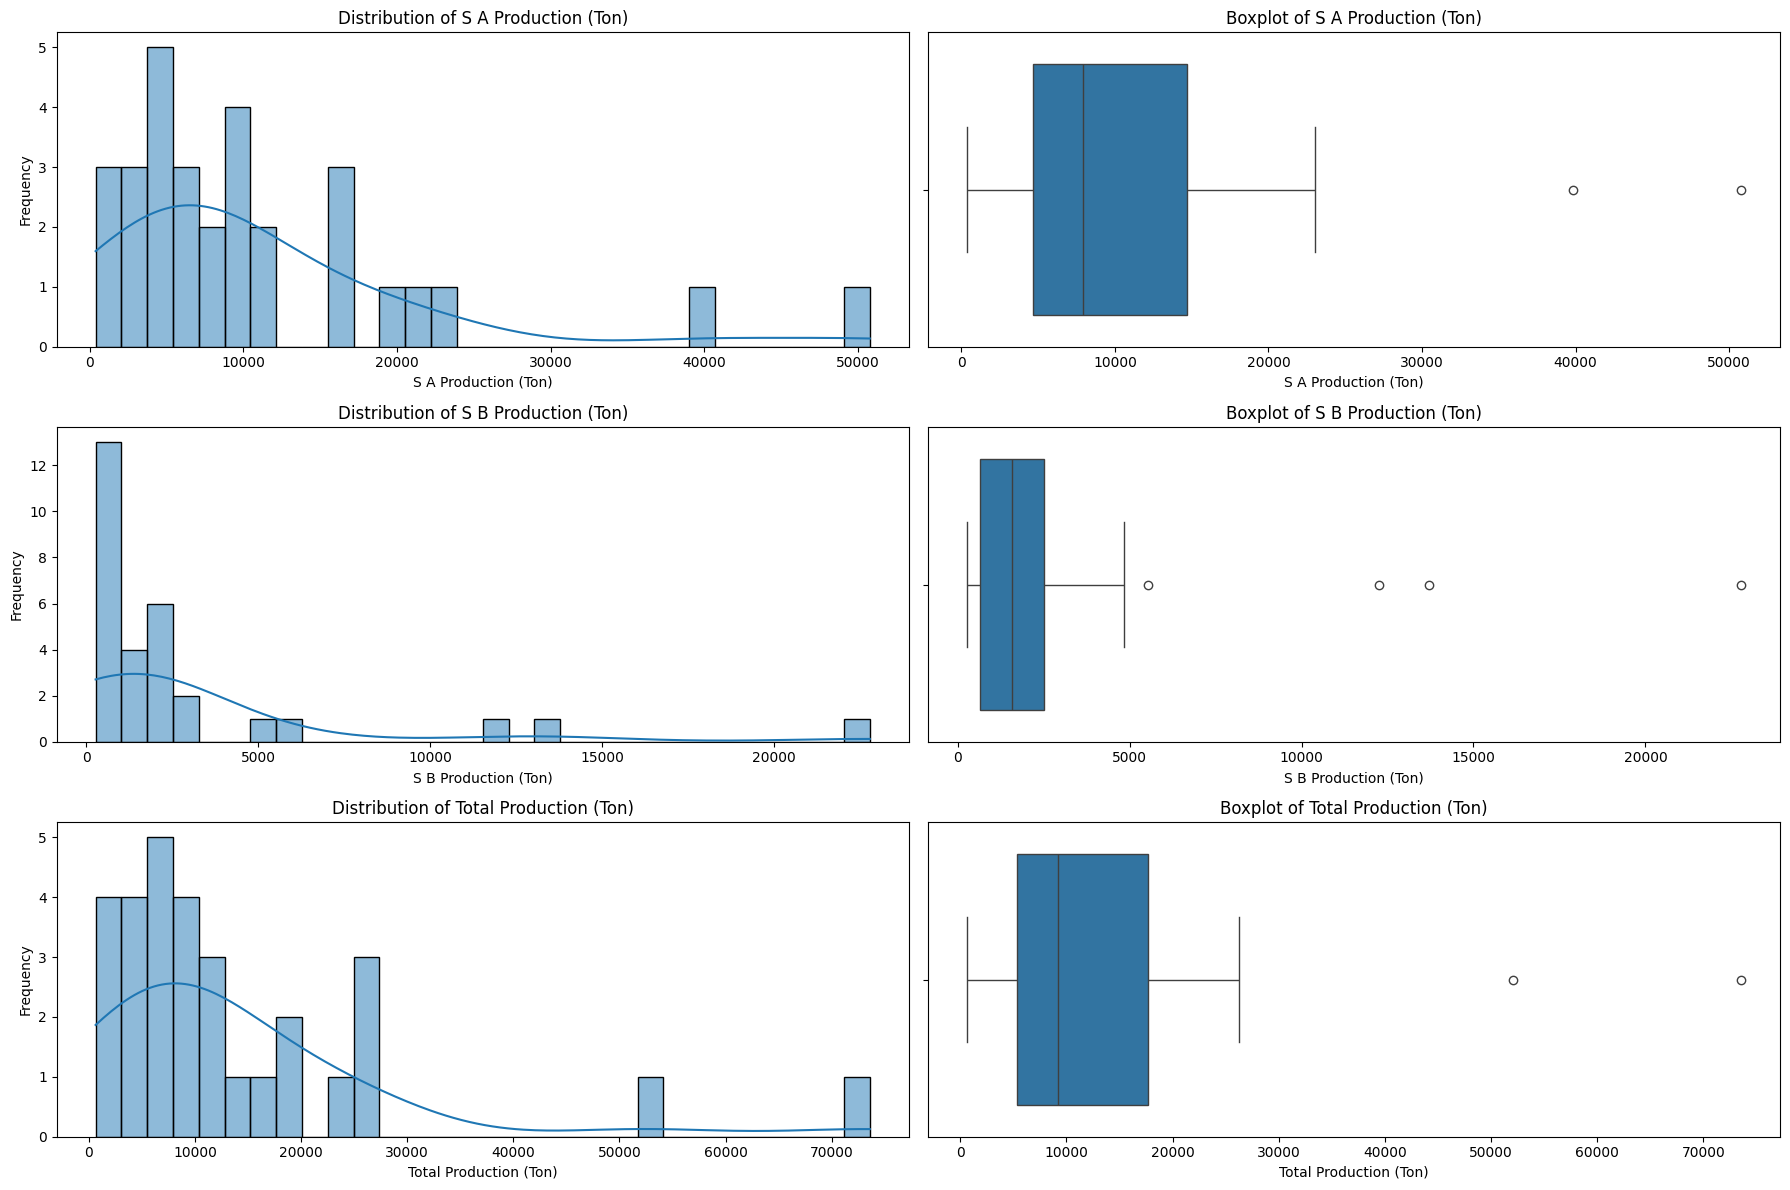

In [26]:
#Analyze distribution of maize production. Create histograms or boxplots to
#visualize the spread of production values.

# Distribution Analysis - Histograms and  Boxplots
plt.figure(figsize=(18, 12))

# Histogram of S A Production
plt.subplot(3, 2, 1)
sns.histplot(Maize_data['S A Production (Ton)'], kde=True, bins=30)
plt.title('Distribution of S A Production (Ton)')
plt.xlabel('S A Production (Ton)')
plt.ylabel('Frequency')

# Horizontal Boxplot of S A Production
plt.subplot(3, 2, 2)
sns.boxplot(x=Maize_data['S A Production (Ton)'], orient='h')
plt.title('Boxplot of S A Production (Ton)')
plt.xlabel('S A Production (Ton)')

# Histogram of S B Production
plt.subplot(3, 2, 3)
sns.histplot(Maize_data['S B Production (Ton)'], kde=True, bins=30)
plt.title('Distribution of S B Production (Ton)')
plt.xlabel('S B Production (Ton)')
plt.ylabel('Frequency')

# Horizontal Boxplot of S B Production
plt.subplot(3, 2, 4)
sns.boxplot(x=Maize_data['S B Production (Ton)'], orient='h')
plt.title('Boxplot of S B Production (Ton)')
plt.xlabel('S B Production (Ton)')

# Histogram of Total Production
plt.subplot(3, 2, 5)
sns.histplot(Maize_data['Total Production (Ton)'], kde=True, bins=30)
plt.title('Distribution of Total Production (Ton)')
plt.xlabel('Total Production (Ton)')
plt.ylabel('Frequency')

# Horizontal Boxplot of Total Production
plt.subplot(3, 2, 6)
sns.boxplot(x=Maize_data['Total Production (Ton)'], orient='h')
plt.title('Boxplot of Total Production (Ton)')
plt.xlabel('Total Production (Ton)')

plt.tight_layout()
plt.show()


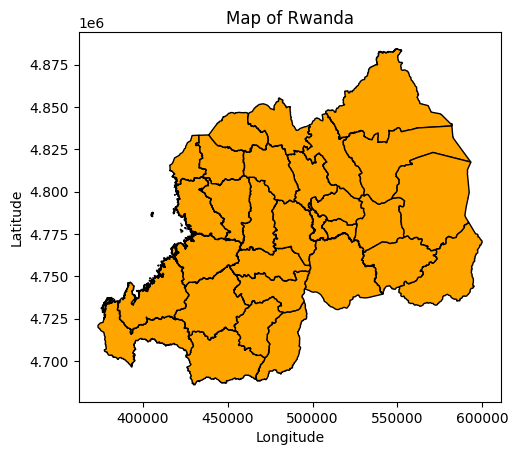

In [32]:
#Visualize maize production on a map of Rwanda (using libraries like geopandas)
# Visualize maize production on a map of Rwanda

# Load Rwanda shapefile
rwanda_shapefile = "/content/rwa_district.zip"
rwanda_map = gpd.read_file(rwanda_shapefile)



# Plot the map
rwanda_map.plot(color='Orange', edgecolor='black')
plt.title('Map of Rwanda')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [35]:
# Print the column names
print("Column names in the shapefile:")
print(rwanda_map.columns)

# Display the first few rows
print("\nFirst few rows of the shapefile:")
print(rwanda_map.head())


Column names in the shapefile:
Index(['Dist_ID', 'District', 'geometry'], dtype='object')

First few rows of the shapefile:
   Dist_ID    District                                           geometry
0     11.0  Nyarugenge  POLYGON ((498847.140 4793516.119, 498839.366 4...
1     12.0      Gasabo  POLYGON ((516449.907 4801793.262, 516466.827 4...
2     13.0    Kicukiro  POLYGON ((515970.104 4783945.205, 516021.558 4...
3     21.0      Nyanza  POLYGON ((494532.396 4753088.125, 494601.047 4...
4     22.0    Gisagara  POLYGON ((495061.551 4734993.648, 495089.120 4...


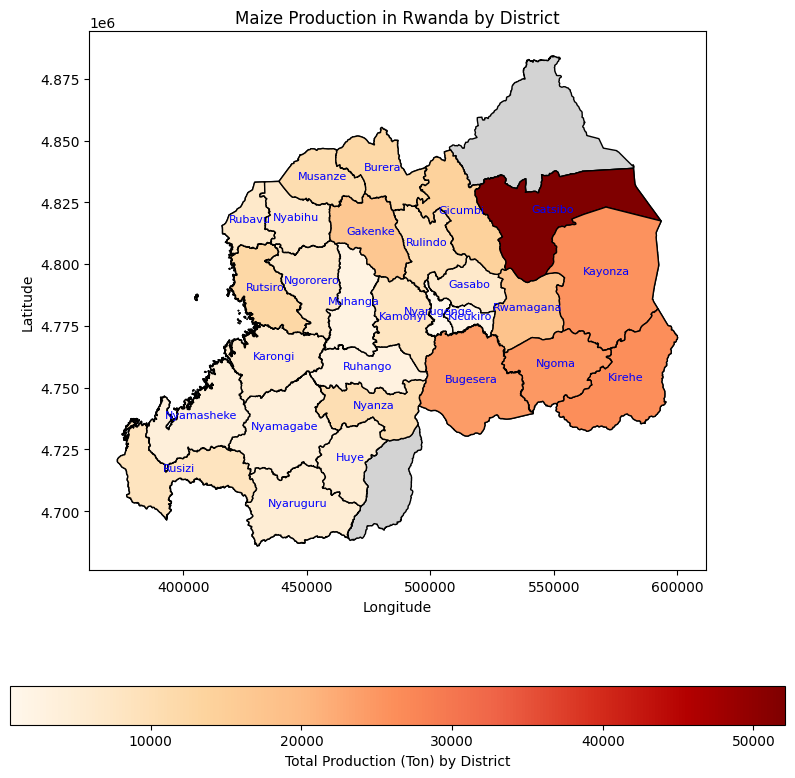

In [39]:
merged_data = rwanda_map.merge(Maize_data, left_on='District', right_on='District')

# Plot the merged data
fig, ax = plt.subplots(figsize=(10, 10))
rwanda_map.plot(ax=ax, color='lightgrey', edgecolor='black')
merged_data.plot(ax=ax, column='Total Production (Ton)', legend=True,
                 legend_kwds={'label': "Total Production (Ton) by District",
                              'orientation': "horizontal"},
                 cmap='OrRd', edgecolor='black')

# Add district names to the map
for idx, row in merged_data.iterrows():
    plt.annotate(text=row['District'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='blue')

plt.title('Maize Production in Rwanda by District')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Write-up:

#### 1. Summary of Findings:
Upon analyzing the maize production data from various districts, several key observations were made:

1. **Top Producing Districts**:
    - The analysis revealed that certain districts consistently produce significantly higher quantities of maize compared to others. These top-producing districts are highlighted below:
        

  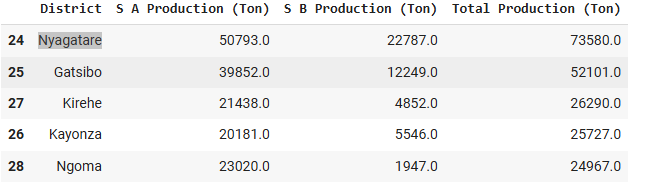

 - The exact names and production quantities of these districts were identified using the aggregated data and sorted in descending order of total production. Here’s a snapshot of the top maize-producing districts:

#### 2. Outliers in Production:
- **Identification of Outliers**:
    - Boxplot analysis revealed that there are indeed outliers in the dataset. These outliers are districts with production values significantly higher or lower than the rest of the data points.

- **Outliers in S A Production (Ton)**:
    - The boxplot for `S A Production (Ton)` showed a few districts with exceptionally high production values, indicating that these districts are outliers. These outliers might be due to unusually favorable agricultural conditions or large-scale farming practices.

- **Outliers in S B Production (Ton)**:
    - Similar to `S A Production`, the boxplot for `S B Production (Ton)` also indicated the presence of outliers. These outliers suggest significant variations in production practices or reporting inconsistencies.

- **Outliers in Total Production (Ton)**:
    - The total production boxplot confirmed the presence of outliers. These districts might have benefited from combined effects of favorable weather, soil conditions, and effective farming techniques.

### Visualizations:
- **Histograms**:
    - Histograms were used to visualize the frequency distribution of maize production across different districts. They showed a right-skewed distribution, indicating that while most districts have moderate production, a few districts produce exceptionally high quantities.

- **Boxplots**:
    - Horizontal boxplots for `S A Production (Ton)`, `S B Production (Ton)`, and `Total Production (Ton)` provided a clear view of the spread and outliers in the dataset. The whiskers and individual data points outside them were instrumental in identifying the outliers.

### Map Visualization:
- **Geographical Spread**:
    - Using `geopandas`, a map of Rwanda was plotted to visualize maize production. Districts with higher production were marked with larger and darker points, providing a geographical context to the production data.

### Conclusion:
- **High Production Districts**:
    - The analysis successfully identified the top maize-producing districts, providing valuable insights for policymakers and agricultural planners.

- **Outliers and Their Implications**:
    - The presence of outliers highlights the need for further investigation into the factors contributing to exceptionally high or low production in certain districts. Understanding these factors can help replicate success in other regions and address issues in lower-performing districts.

This analysis not only sheds light on the distribution and concentration of maize production but also emphasizes the importance of targeted agricultural strategies to enhance overall productivity.

**Next Steps**:
Based on these findings, further investigation could be done to understand the factors contributing to high maize production in the top-producing districts. Additionally, strategies could be developed to enhance production in lower-producing districts, thereby improving overall maize yield.